In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

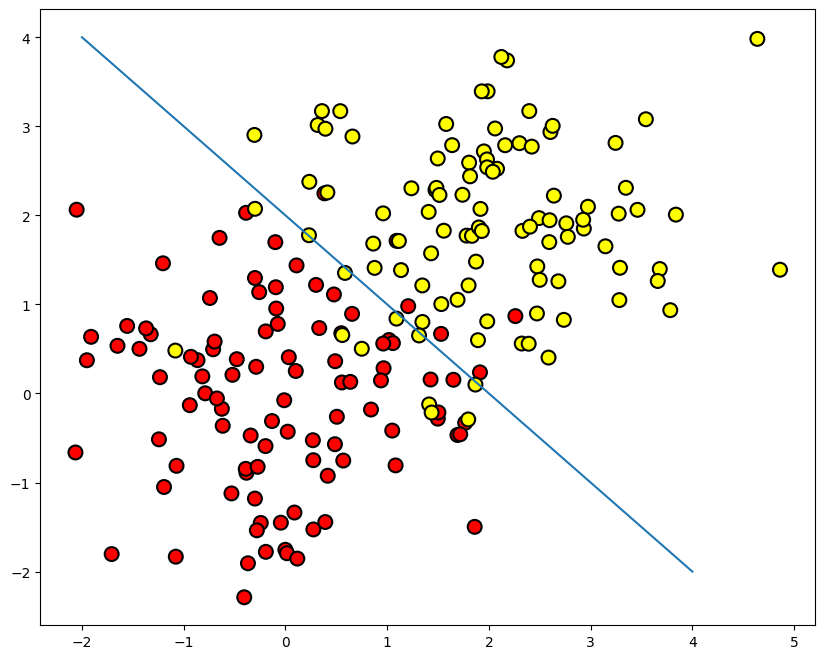

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

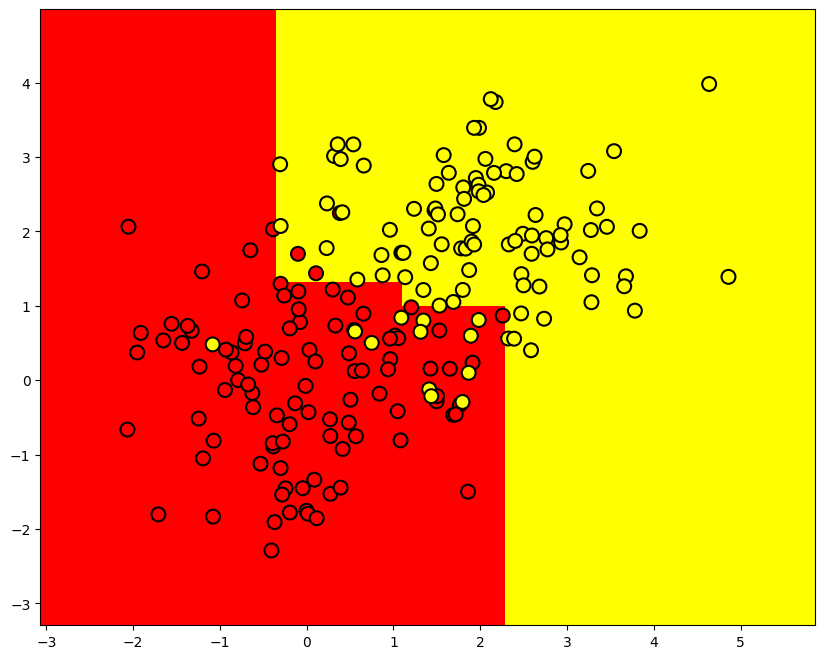

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(clf_tree, feature_names=['x1', 'x2'], out_file='small_tree.dot', filled=True)
!dot -Tpng '../../img/small_tree.dot' -o 'small_tree.png'


'dot' is not recognized as an internal or external command,
operable program or batch file.


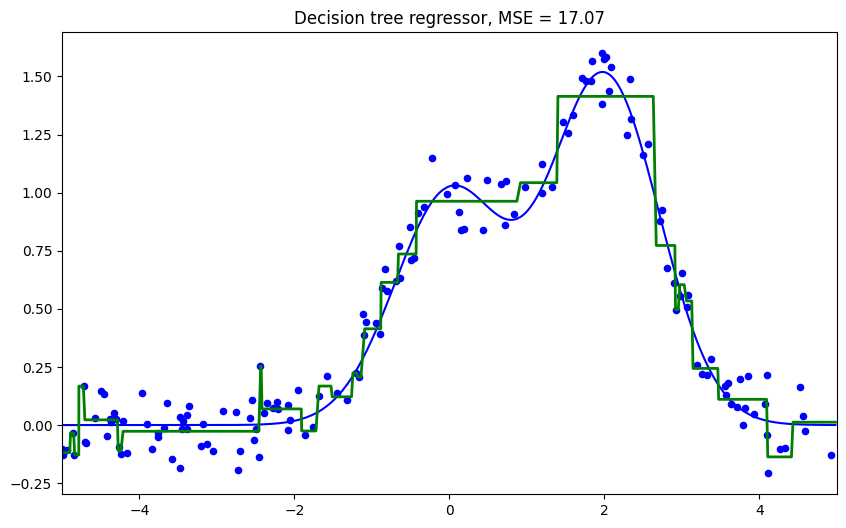

In [6]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [7]:
## Метод ближайших соседей

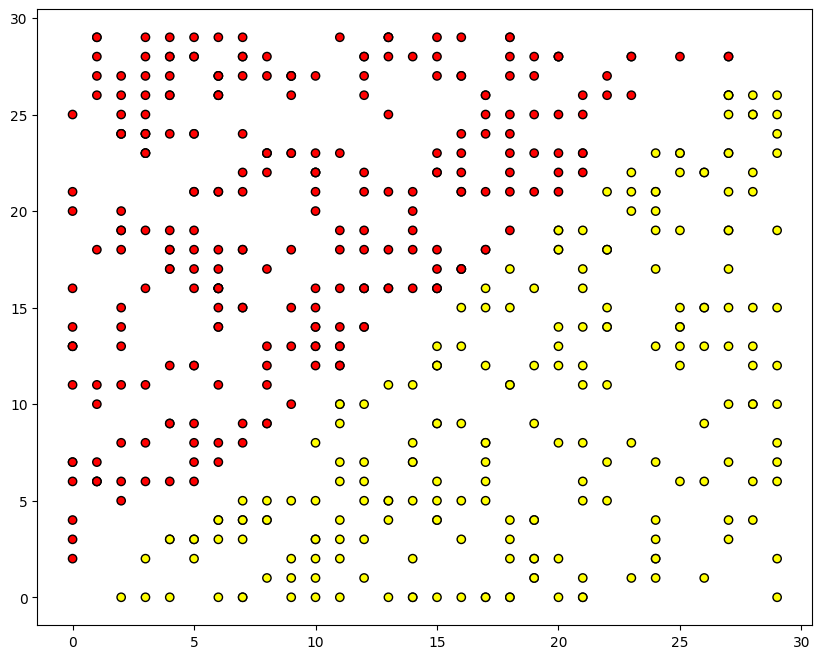

In [8]:
# Формально основой метода является гипотеза компактности: если метрика
#расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

#ля метода ближайших соседей существует немало важных теорем, утверждающих, что на "бесконечных" выборках 
#это оптимальный метод классификации. Авторы классической книги "The Elements of Statistical Learning"
#считают kNN теоретически идеальным алгоритмом, применимость которого просто ограничена вычислительными
#возможностями и проклятием размерностей.

def form_linearly_separable_data(n=500, x1_min=0, x1_max=30, x2_min=0, x2_max=30):
    data, target = [], []
    for i in range(n):
        x1, x2 = np.random.randint(x1_min, x1_max), np.random.randint(x2_min, x2_max)

        if np.abs(x1 - x2) > 0.5:
            data.append([x1, x2])
            target.append(np.sign(x1 - x2))
    return np.array(data), np.array(target)

X, y = form_linearly_separable_data()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='black');

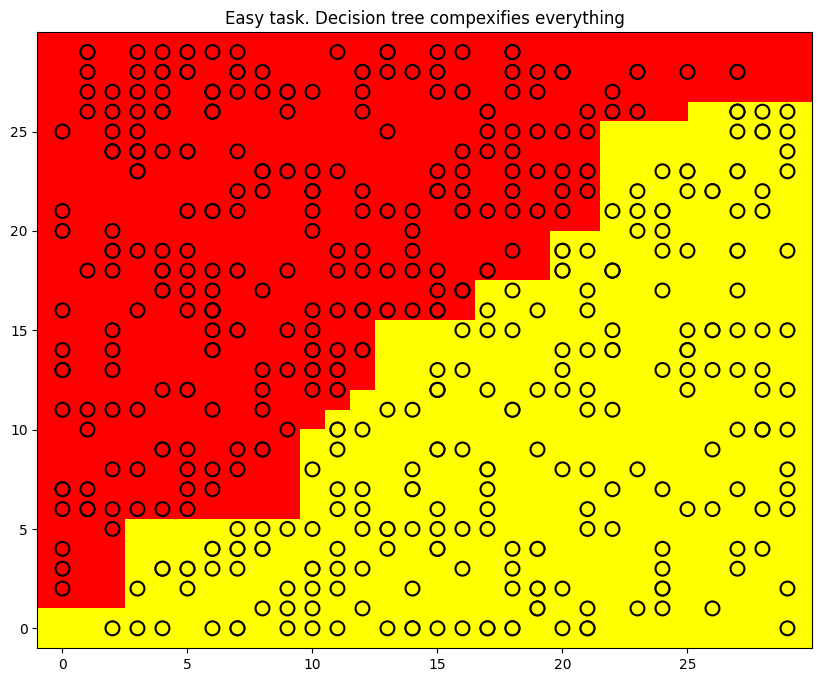

In [9]:
tree = DecisionTreeClassifier(random_state=17).fit(X, y)

xx, yy = get_grid(X)
predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title('Easy task. Decision tree compexifies everything');

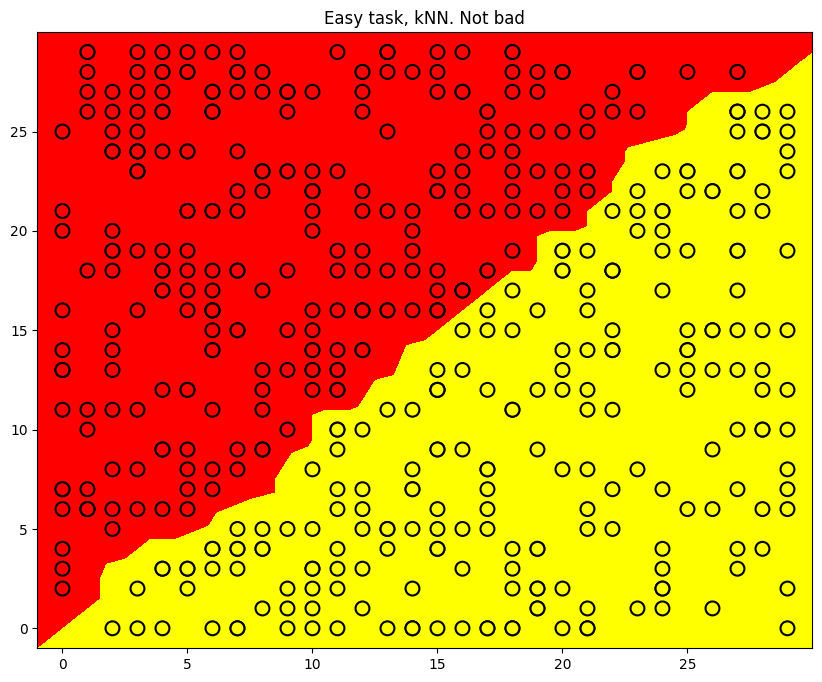

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X, y)

xx, yy = get_grid(X)
predicted = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.title('Easy task, kNN. Not bad');

In [11]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred) # (0.97, 0.666)

(0.9740740740740741, 0.6666666666666666)

In [13]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [14]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 10, 'max_features': 50}, 0.8568203376968316)

In [15]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) 

0.9864858028204642

In [16]:
# LOGISTIC REGRESSION

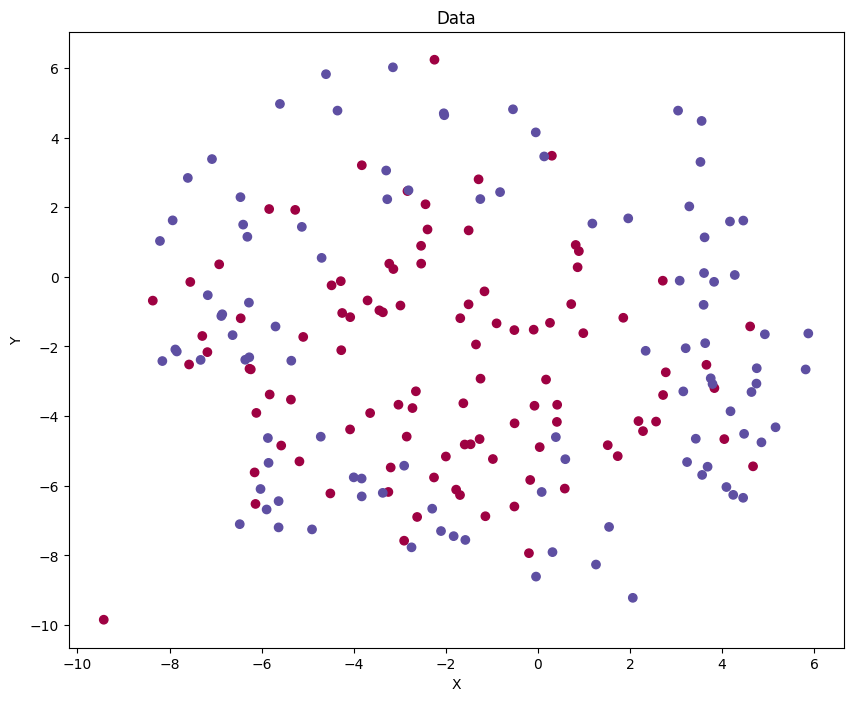

In [17]:
np.random.seed(12)

# Генерация данных внутри окружности
radius = 3
num_samples = 100
theta = np.random.rand(num_samples) * 2 * np.pi
inner_circle_x = radius * np.cos(theta) + 2 * np.random.normal(-0.9, 1, num_samples)
inner_circle_y = radius * np.sin(theta) + 2 * np.random.normal(-1, 1, num_samples)
inner_circle_label = np.zeros(num_samples)

# Генерация данных вне окружности
outer_radius = 6
outer_circle_x = outer_radius * np.cos(theta) + 2 * np.random.normal(-0.7, 0.6, num_samples)
outer_circle_y = outer_radius * np.sin(theta) + 2 * np.random.normal(-0.8, 0.8, num_samples)
outer_circle_label = np.ones(num_samples)

# Объединение данных
data_x = np.concatenate((inner_circle_x, outer_circle_x))
data_y = np.concatenate((inner_circle_y, outer_circle_y))
data_label = np.concatenate((inner_circle_label, outer_circle_label))

# Визуализация данных
plt.scatter(data_x, data_y, c=data_label, cmap=plt.cm.Spectral)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data')
plt.show()

Доля правильных ответов классификатора на обучающей выборке: 0.685


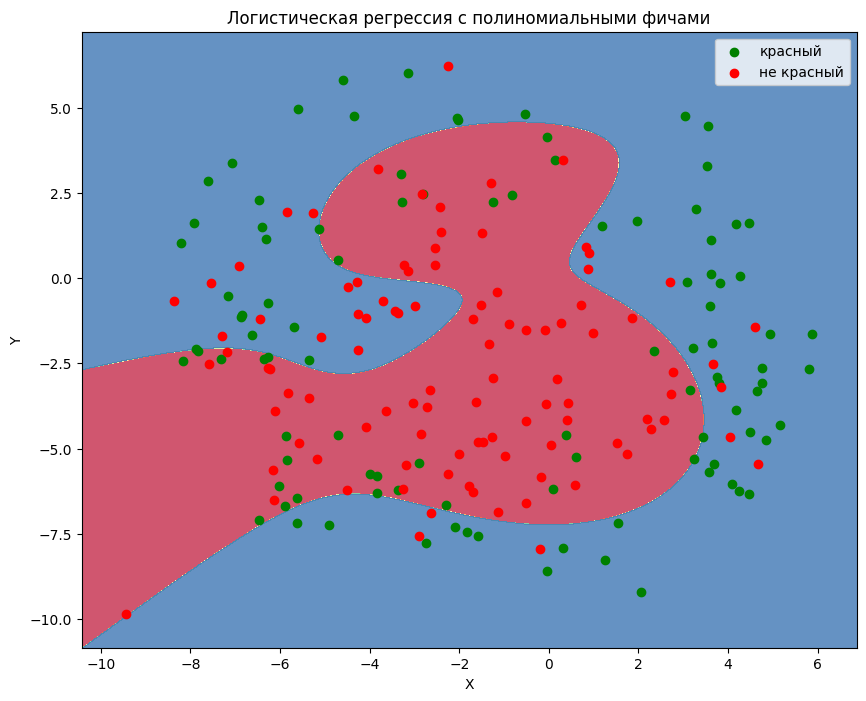

In [18]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Создание полиномиальных фич
data = np.column_stack((data_x, data_y))
poly = PolynomialFeatures(degree=4)
data_poly = poly.fit_transform(data)

C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(data_poly, data_label)

# Функция для визуализации разделяющей границы
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    if poly_featurizer:
        X_test = poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        X_test = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(X_test)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Визуализация
plot_boundary(logit, data, data_label, grid_step=.01, poly_featurizer=poly)

plt.scatter(data_x[data_label == 1], data_y[data_label == 1], c='green', label='красный')
plt.scatter(data_x[data_label == 0], data_y[data_label == 0], c='red', label='не красный')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Логистическая регрессия с полиномиальными фичами')
plt.legend()

print("Доля правильных ответов классификатора на обучающей выборке:", round(logit.score(data_poly, data_label), 3))

plt.show()

Доля правильных ответов классификатора на обучающей выборке: 0.695


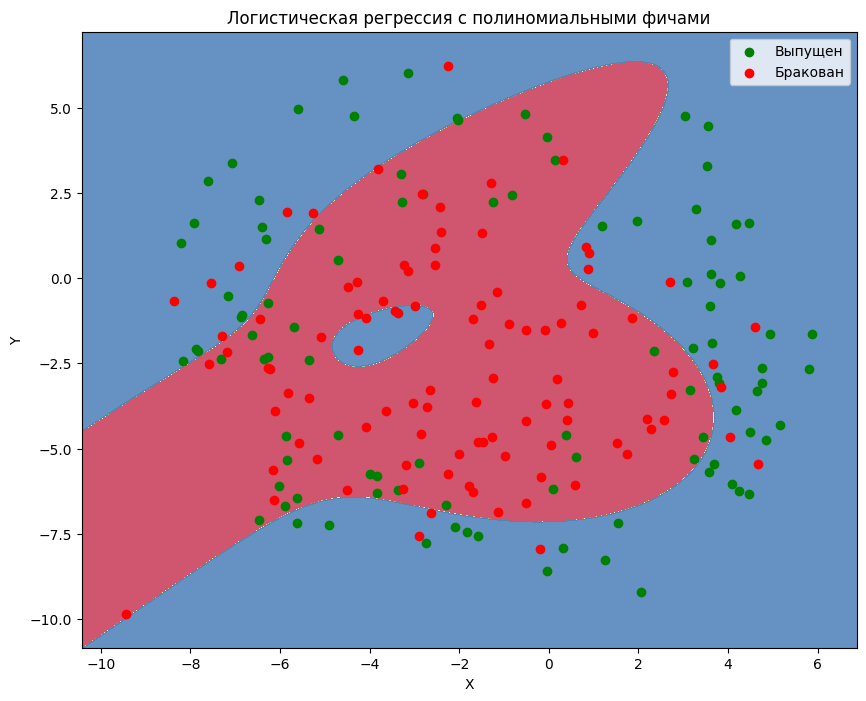

In [19]:
# Меняем C
C = 1e1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(data_poly, data_label)

# Визуализация
plot_boundary(logit, data, data_label, grid_step=.01, poly_featurizer=poly)

plt.scatter(data_x[data_label == 1], data_y[data_label == 1], c='green', label='Выпущен')
plt.scatter(data_x[data_label == 0], data_y[data_label == 0], c='red', label='Бракован')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Логистическая регрессия с полиномиальными фичами')
plt.legend()

print("Доля правильных ответов классификатора на обучающей выборке:", round(logit.score(data_poly, data_label), 3))

plt.show()

Доля правильных ответов классификатора на обучающей выборке: 0.705


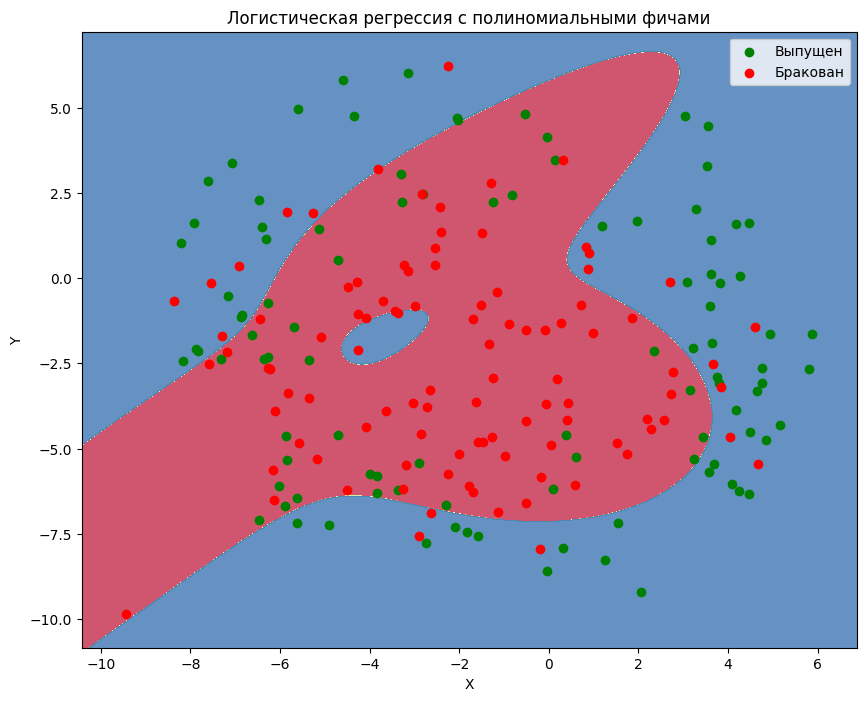

In [20]:
# Меняем C
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(data_poly, data_label)

# Визуализация
plot_boundary(logit, data, data_label, grid_step=.01, poly_featurizer=poly)

plt.scatter(data_x[data_label == 1], data_y[data_label == 1], c='green', label='Выпущен')
plt.scatter(data_x[data_label == 0], data_y[data_label == 0], c='red', label='Бракован')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Логистическая регрессия с полиномиальными фичами')
plt.legend()

print("Доля правильных ответов классификатора на обучающей выборке:", round(logit.score(data_poly, data_label), 3))

plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.9s finished


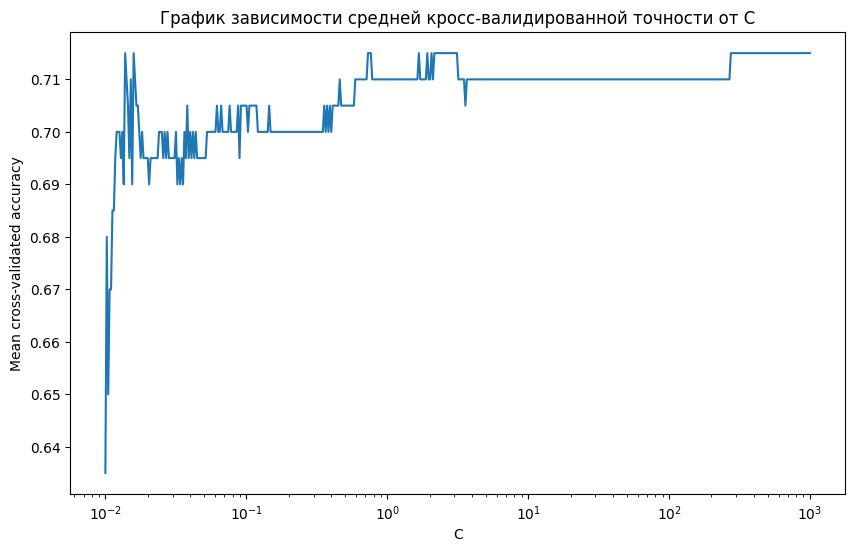

In [21]:
# Hyper parameters 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(data_poly, data_label)

# Визуализация графика
plt.figure(figsize=(10, 6))
plt.plot(logit_searcher.Cs_, np.mean(logit_searcher.scores_[1], axis=0))
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean cross-validated accuracy')
plt.title('График зависимости средней кросс-валидированной точности от C')
plt.show()

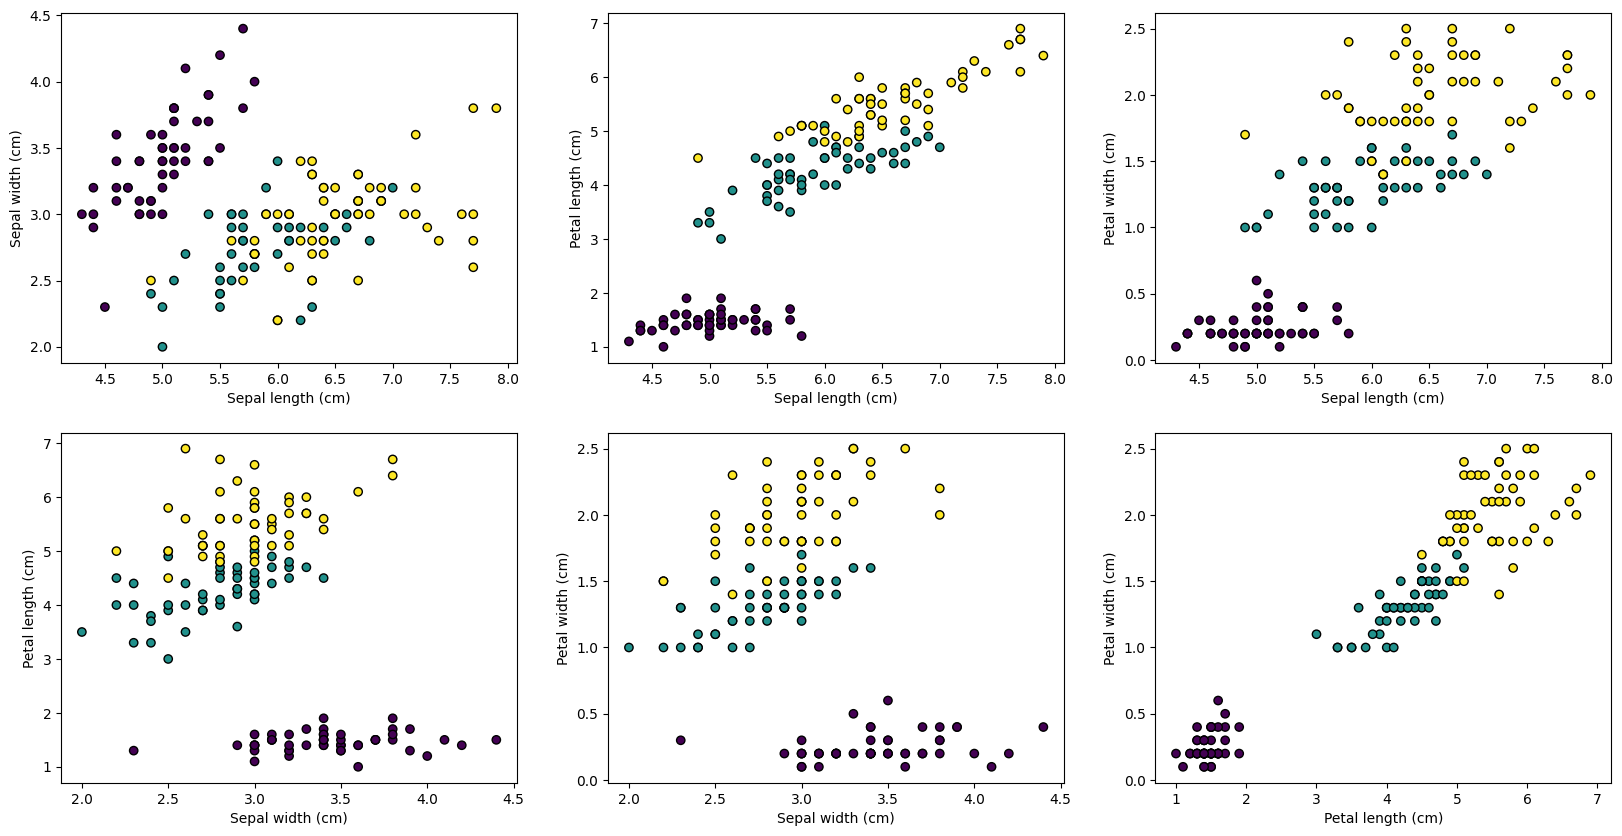

In [76]:
# random forest

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
data = load_iris()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание графиков для всех пар признаков
plt.figure(figsize=(20, 10))

# 1 к 2
plt.subplot(2, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# 1 к 3
plt.subplot(2, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c=y, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')

# 1 к 4
plt.subplot(2, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c=y, edgecolors='k')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')

# 2 к 3
plt.subplot(2, 3, 4)
plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal length (cm)')

# 2 к 4
plt.subplot(2, 3, 5)
plt.scatter(X[:, 1], X[:, 3], c=y, edgecolors='k')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

# 3 к 4
plt.subplot(2, 3, 6)
plt.scatter(X[:, 2], X[:, 3], c=y, edgecolors='k')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.show()


In [78]:
# my super plot func
from matplotlib.colors import ListedColormap


# Цветовые карты для границ классификации
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def cool_plot(clf, name, axis, X):
    plt.figure(figsize=(12, 12))
    h = .02  # шаг сетки
    
    for i in range(0, axis):
        for j in range(i+1 , axis):
            plt.subplot(3, 3, i * 2 + j )
            
            x_min, x_max = X[:, i].min() - 0.5, X[:, i].max() + 0.5
            y_min, y_max = X[:, j].min() - 0.5, X[:, j].max() + 0.5
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            
            clf.fit(X_train[:, [i, j]], y_train)
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
            plt.scatter(X[:, i], X[:, j], c=y, cmap=cmap_bold, edgecolors='k')
            plt.xlabel(data.feature_names[i])
            plt.ylabel(data.feature_names[j])
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())
            plt.title(name)

    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

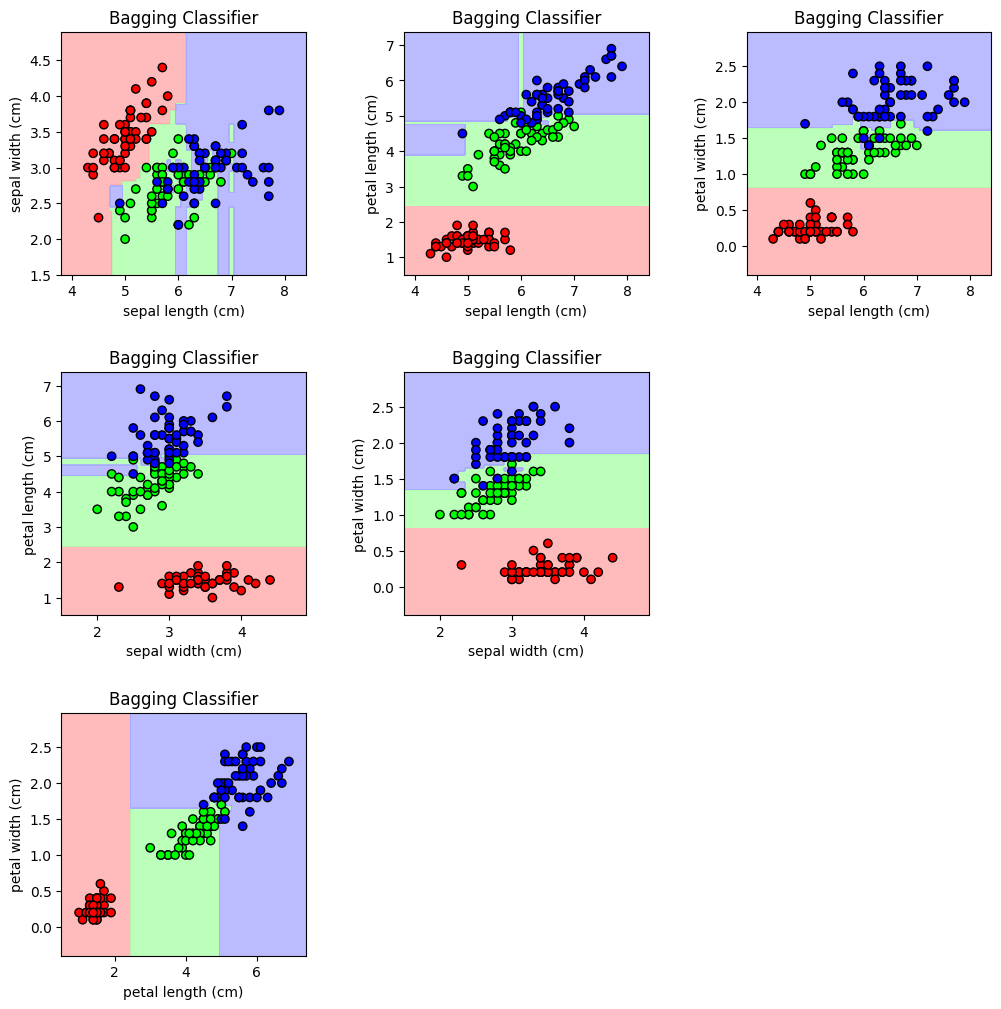

Точность бэггинга: 1.0


In [79]:



# Использование бэггинга
bagging_classifier = BaggingClassifier(n_estimators=8, random_state=0)



cool_plot(bagging_classifier, "Bagging Classifier", 4, X)

bagging_classifier.fit(X_train, y_train)
bagging_predictions = bagging_classifier.predict(X_test)


print("Точность бэггинга:", accuracy_score(y_test, bagging_predictions))

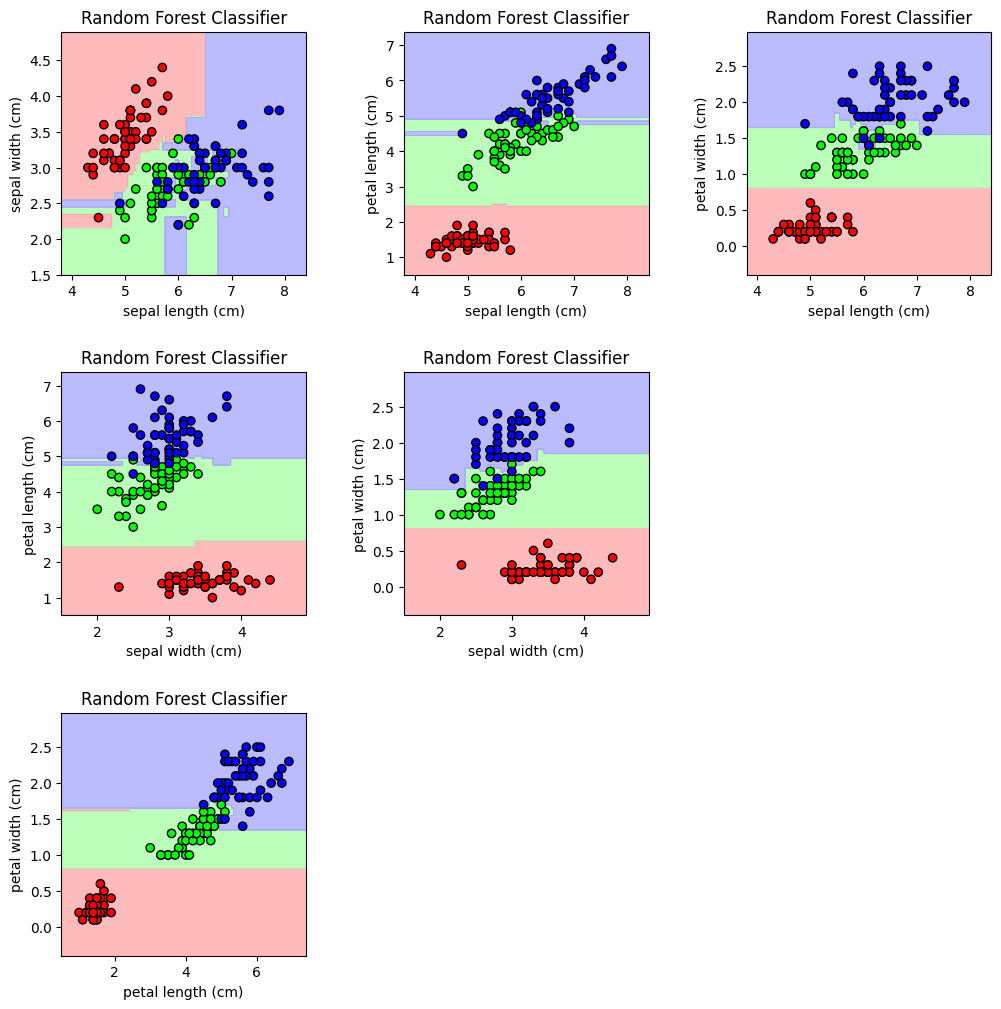

Точность случайного леса: 1.0


In [80]:
from sklearn.ensemble import RandomForestClassifier


random_forest_classifier = RandomForestClassifier(n_estimators=8, random_state=0)
random_forest_classifier.fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)

cool_plot(random_forest_classifier, "Random Forest Classifier", 4 ,X)

print("Точность случайного леса:", accuracy_score(y_test, random_forest_predictions))

In [62]:
# теперь попробуем решить задачу с помощью логической регресии

# стоило бы ввести полиномиальную модель, но слишком много размерностей

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(X_train, y_train)
# Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели логистической регрессии: {accuracy:.2f}')

Точность модели логистической регрессии: 1.00


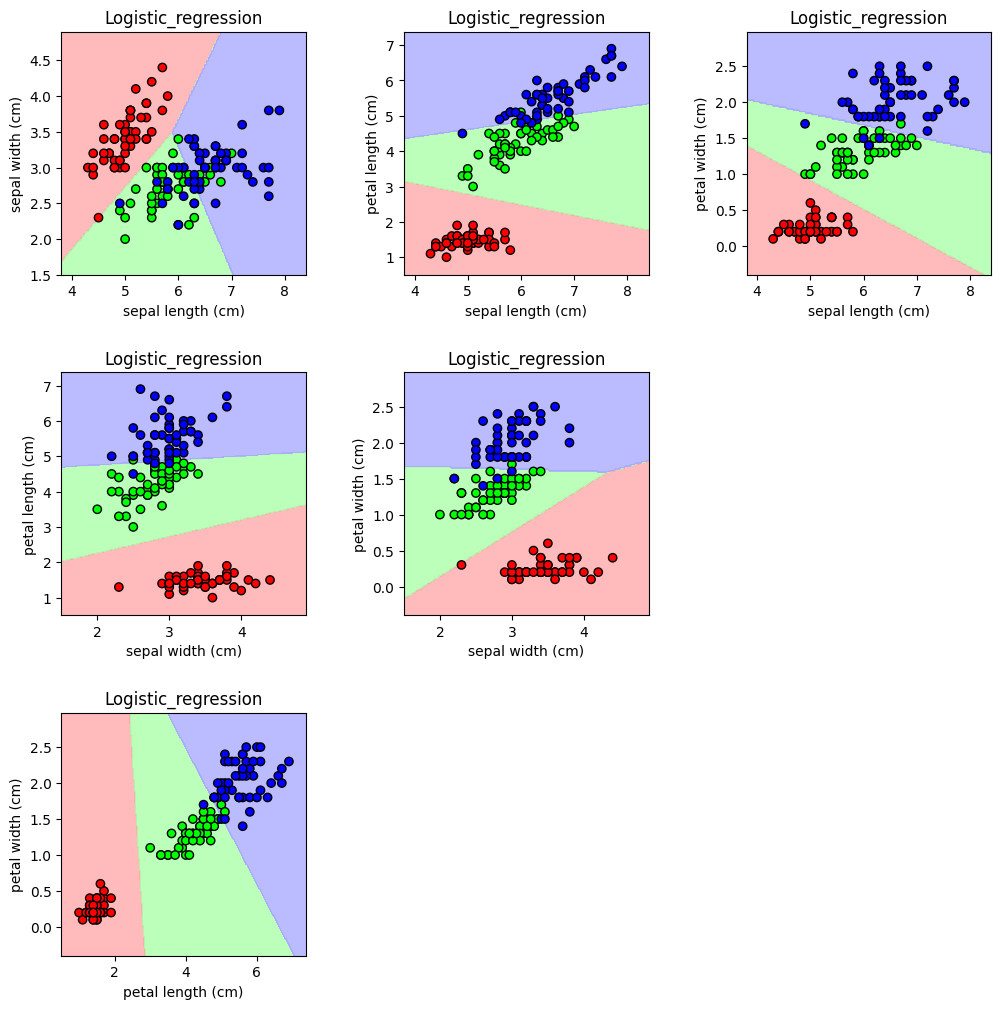

In [82]:
cool_plot(logistic_regression, "Logistic_regression", 4, X)

In [31]:
## some augmentation

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,1)) 
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [33]:
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [34]:
vect = CountVectorizer(ngram_range=(1,2)) 
print(vect.fit_transform(['no i have cows', 'i have no cows']).toarray())

[[1 1 1 0 1 0 1]
 [1 1 0 1 1 1 0]]


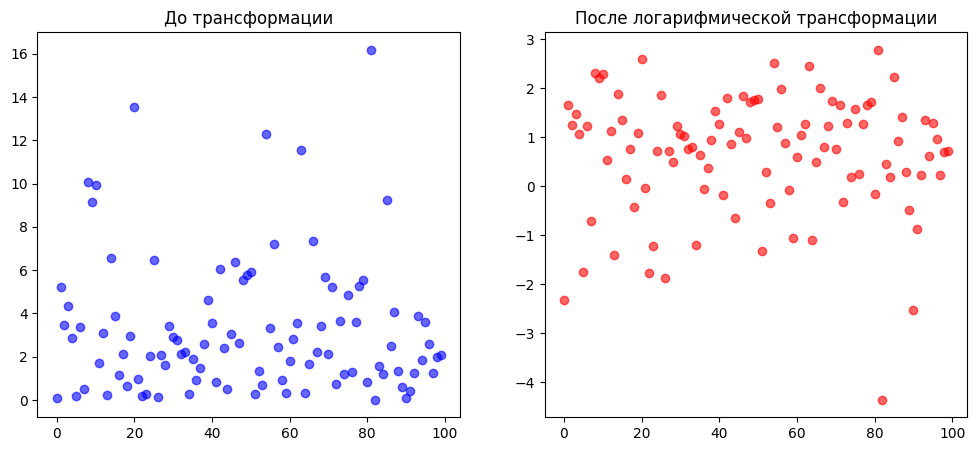

In [35]:
x = np.random.exponential(scale=3.0, size=100)

# Визуализируем данные до и после логарифмической трансформации
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# График до трансформации
axs[0].scatter(range(len(x)), x, color='b', alpha=0.6)
axs[0].set_title('До трансформации')

# График после логарифмической трансформации
x_transformed = np.log(x)
axs[1].scatter(range(len(x_transformed)), x_transformed, color='r', alpha=0.6)
axs[1].set_title('После логарифмической трансформации')

plt.show()

In [36]:
# уменьшаем размерности

In [37]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

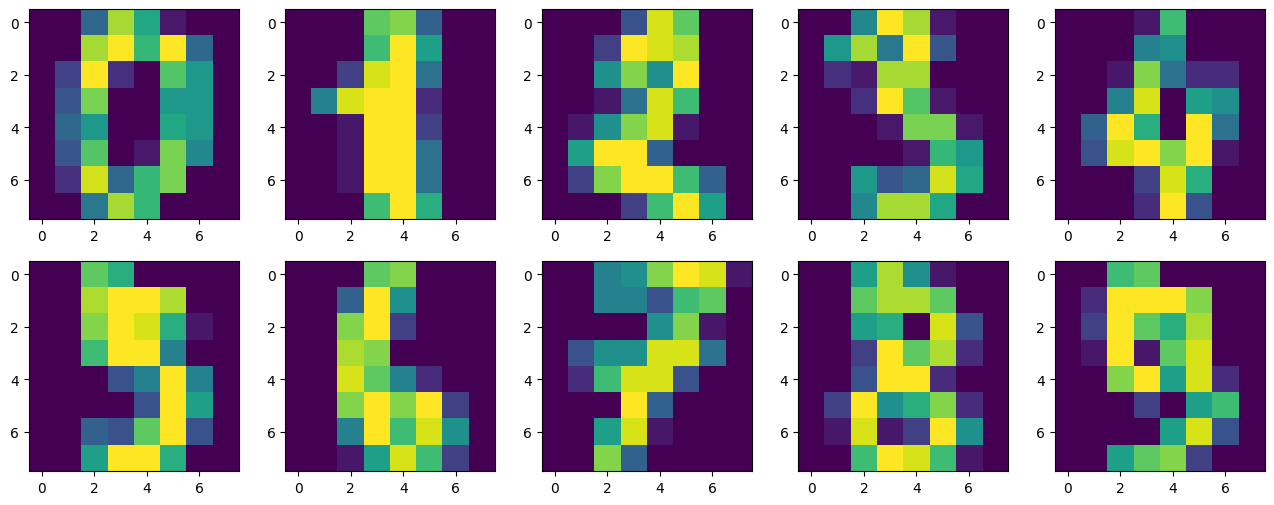

In [38]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

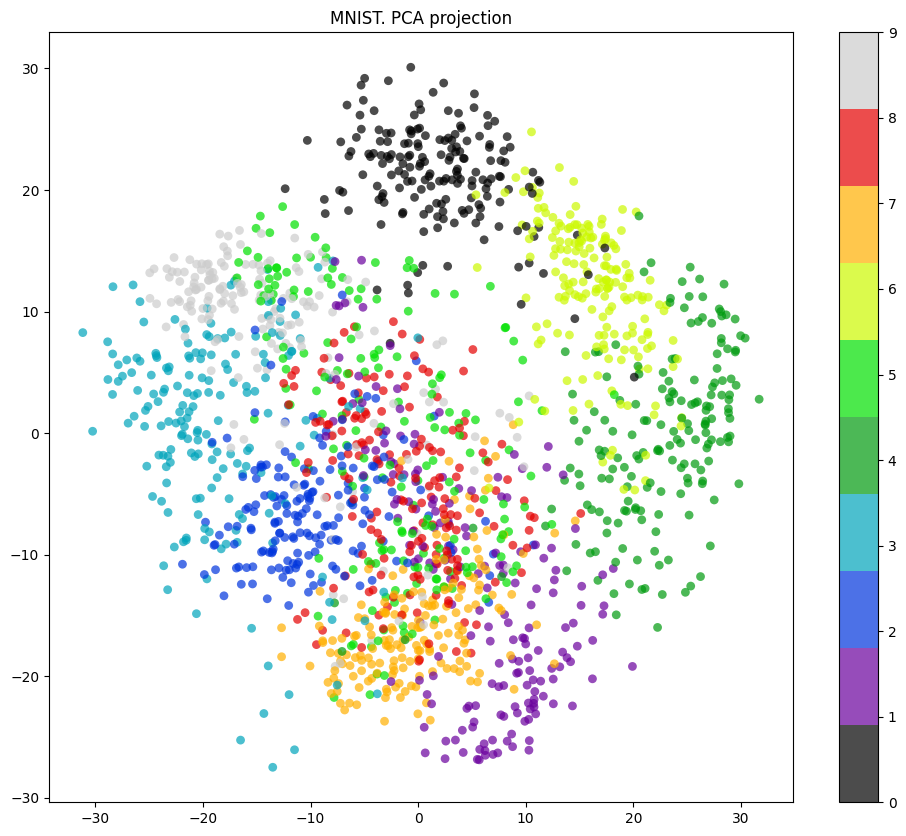

In [39]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

CPU times: total: 42.5 s
Wall time: 14.3 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

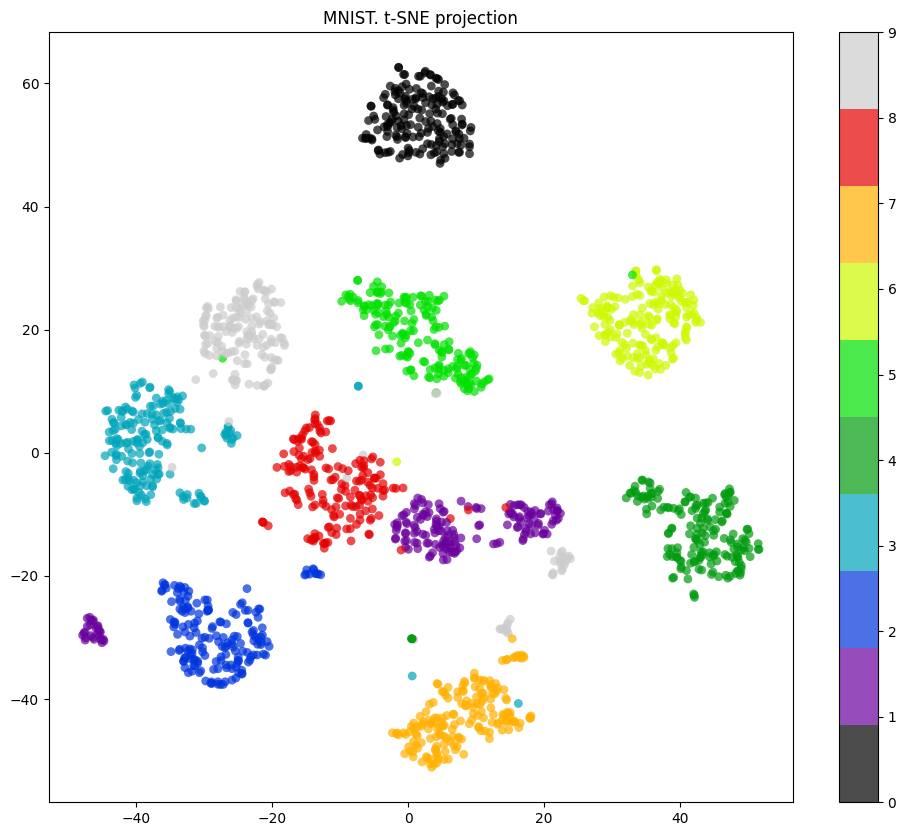

In [40]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

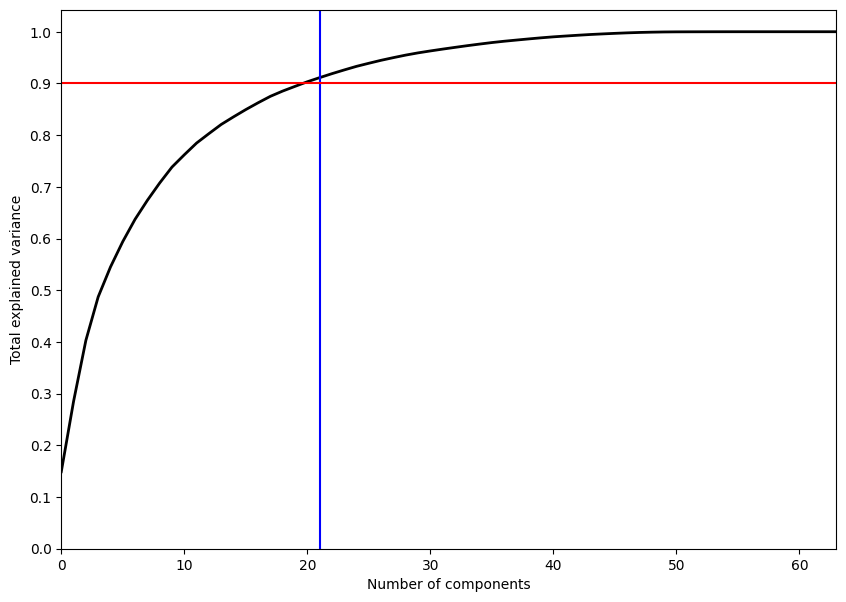

In [41]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();